In [145]:
import warnings
import os
import urllib3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings("always")

In [146]:
DATASETS_DIRECTORY = os.path.join(os.getcwd(), "datasets")

train_data = pd.read_csv(os.path.join(DATASETS_DIRECTORY, "train.csv"))
test_data = pd.read_csv(os.path.join(DATASETS_DIRECTORY, "test.csv"))
full_data = pd.concat([train_data,test_data])

In [147]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [148]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3772f332b0>,
      dtype=object)

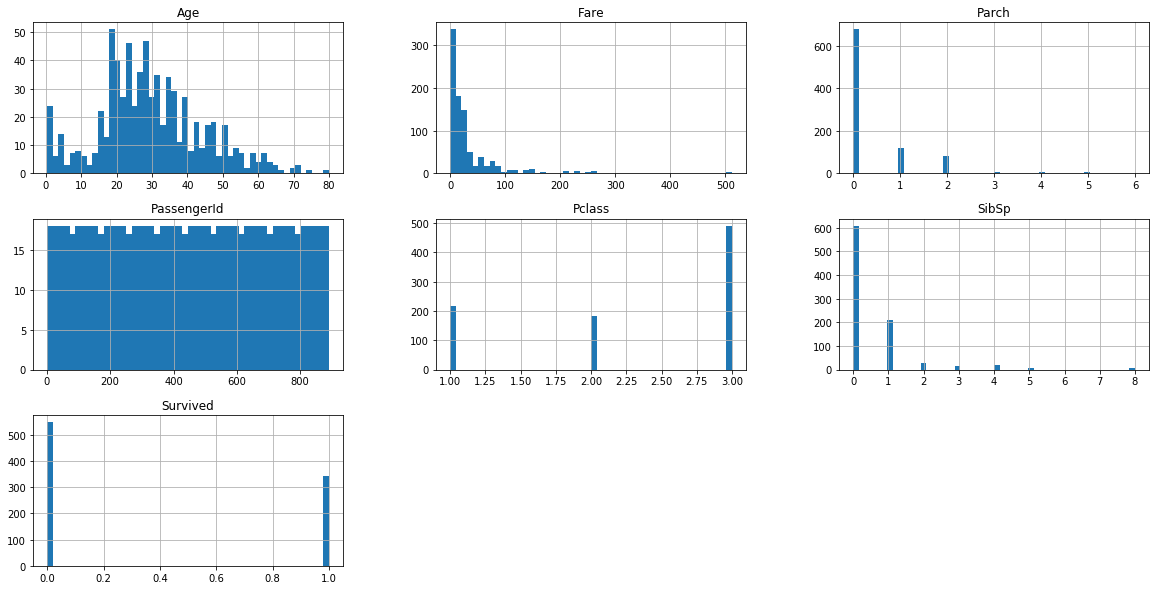

In [149]:
train_data.hist(bins=50, figsize=(20,10))

In [150]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

SES_Dictionary = {
    1: "Upper",
    2: "Middle",
    3: "Lower"
}

def extract_titles(df):
    df["Title"] = df.Name.map(lambda x: x.split(',')[1].split('.')[0].strip())
    df["Title"] = df.Title.map(Title_Dictionary)
    
def create_ses(df):
    df["Ses"] = df.Pclass.map(SES_Dictionary)    
    
def has_cabin(df):
    df["Hascabin"] = [0 if pd.isnull(x) else 1 for x in df["Cabin"]]
    return df

def age_group(df):
    df['Agegroup'] = df['Age'].map(lambda s: "Children" if s < 15 else ("Youth" if 15 <= s <= 24 else "Adult"))
    return df

def fare_group(df):
    df['Faregroup'] = df['Pclass'].map(lambda s: "low" if s == 1 else ("medium" if s == 2 else "high"))
    return df

def round_fare(df):
    df["Fare"] = np.round(df["Fare"], 0)

def process_family(df):
    # introducing a new feature : the size of families (including the passenger)
    df['Familysize'] = df['Parch'] + df['SibSp'] + 1
    
    # introducing other features based on the family size
    df['Familytype'] = df['Familysize'].map(lambda s: "Single" if s == 1 else ("Small" if 2 <= s <= 4 else "Large"))
    
def cabin_zone(df):
    df["Cabinzone"] = df["Cabin"]
    df["Cabinzone"].fillna("U", inplace=True)
    df["Cabinzone"] = df.Cabinzone.apply(lambda x: x[0])
    return df

def drop_features(df):
    df.drop("Cabin", axis=1, inplace=True)
    df.drop("Ticket", axis=1, inplace=True)
    df.drop("Name", axis=1, inplace=True)
    df.drop("PassengerId", axis=1, inplace=True)
    df.drop("Survived", axis=1, inplace=True)
    df.drop("Familysize", axis=1, inplace=True)
    #df.drop("Pclass", axis=1, inplace=True)
    #df.drop("SibSp", axis=1, inplace=True)
    #df.drop("Parch", axis=1, inplace=True)
    #df.drop("Age", axis=1, inplace=True)
    
def missing_values(df):
    mean_fare = df[df.Pclass == 3]["Fare"].mean()
    df.at[152, "Fare"] = mean_fare
    df.at[414, "Title"] = "Mrs"
    df.at[61, "Embarked"] = "S"
    df.at[829, "Embarked"] = "S"
    return df




y_train_all = train_data["Survived"]
ids = test_data['PassengerId']


from sklearn.preprocessing import Imputer

imp = Imputer(missing_values="NaN", strategy="mean", axis=0)
full_data["Age"] = imp.fit_transform(full_data[["Age"]])

#has_cabin(full_data)
cabin_zone(full_data)
extract_titles(full_data)
missing_values(full_data)
round_fare(full_data)
create_ses(full_data)
process_family(full_data)
#fare_group(full_data)
#age_group(full_data)

drop_features(full_data)


# Create age category
# Create has_family

In [151]:
full_data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Cabinzone,Title,Ses,Familytype
0,22.0,S,7.0,0,3,male,1,U,Mr,Lower,Small
1,38.0,C,71.0,0,1,female,1,C,Mrs,Upper,Small
2,26.0,S,8.0,0,3,female,0,U,Miss,Lower,Single
3,35.0,S,53.0,0,1,female,1,C,Mrs,Upper,Small
4,35.0,S,8.0,0,3,male,0,U,Mr,Lower,Single


In [152]:
# Find outliers

def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

#tukey_indicies, tuket_values = find_outliers_tukey(full_data["Fare"])
#print(np.sort(tuket_values))

In [153]:
#full_data.sort_values(by='Fare', ascending=False)

In [154]:
full_data = pd.get_dummies(full_data, columns=["Sex", "Title", "Ses", "Embarked", "Cabinzone", "Familytype"])
#, "Faregroup"
full_data.head()

,Age,Fare,Parch,Pclass,SibSp,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,...,Cabinzone_C,Cabinzone_D,Cabinzone_E,Cabinzone_F,Cabinzone_G,Cabinzone_T,Cabinzone_U,Familytype_Large,Familytype_Single,Familytype_Small
0,22.0,7.0,0,3,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,38.0,71.0,0,1,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,26.0,8.0,0,3,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,35.0,53.0,0,1,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,35.0,8.0,0,3,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [155]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
full_data = poly.fit_transform(full_data)

In [156]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_scale = StandardScaler().fit(full_data)
full_data = std_scale.transform(full_data)

minmax_scale = MinMaxScaler().fit(full_data)
full_data = minmax_scale.transform(full_data)

In [157]:
full_data.shape

(1309, 528)

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

X_train_all = full_data[:891]

X_train, X_test, y_train, y_test = train_test_split(X_train_all, y_train_all, random_state=23)

forest_clf = RandomForestClassifier(random_state=42, min_samples_leaf=12, min_samples_split=40, n_estimators=10) 
scores = cross_val_score(forest_clf, X_train, y_train, cv=10, scoring='accuracy')
scores.mean()

0.8220588235294117

In [159]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=12, min_samples_split=40,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [160]:
scores = cross_val_score(forest_clf, X_test, y_test, cv=10, scoring='accuracy')
scores.mean()

0.8046489742141917

In [161]:
predictions_test = forest_clf.predict(X_test)
acc = accuracy_score(y_test, predictions_test)

acc

0.820627802690583

In [162]:
#XGBOOST

from xgboost import XGBClassifier

#xgboost = XGBClassifier()
#xgboost.fit(X_train, y_train)
#scores = cross_val_score(xgboost, X_train, y_train, cv=10, scoring='accuracy')
#scores.mean()


In [163]:
#scores = cross_val_score(xgboost, X_test, y_test, cv=10, scoring='accuracy')
#scores.mean()

In [164]:
X_test_all = full_data[891:]

# predictions with RandomForest
predictions = forest_clf.predict(X_test_all)

# predictions with XGBoost
#predictions = xgboost.predict(X_test_all)

predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [165]:
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('titanic-predictions.csv', index = False)
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
